In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd 
import ast
import seaborn as sns

In [3]:
df = pd.read_csv('CV19-Days-LogReturns')
df.drop(columns= ['Unnamed: 0'], inplace = True)

vWindow = []
vLayer = []
vNeuron = [] 

for i in range(len(df)):
    vWindow.append(list(ast.literal_eval(df['Param Space'][i]))[0])
    vLayer.append(list(ast.literal_eval(df['Param Space'][i]))[1])
    vNeuron.append(list(ast.literal_eval(df['Param Space'][i]))[2])
    
new_df = pd.DataFrame({'Window': vWindow, 'Layer': vLayer, 'Neuron':vNeuron})
new_df['Val loss'] = df['Val loss']

,Window,Layer,Neuron,Val loss
0,1,1,16,6.062513
1,1,1,32,5.944010
2,1,1,64,5.903792
3,1,1,128,5.831638
4,1,1,256,5.776048


In [18]:
vWindowLoss = []
for i in new_df['Window'].unique():
    vWindowLoss.append(np.average(new_df[new_df['Window'] == i]['Val loss']))
    
vLayerLoss = [] 
for i in new_df['Layer'].unique():
    vLayerLoss.append(np.average(new_df[new_df['Layer'] == i]['Val loss']))
    
vNeuronLoss = [] 
for i in new_df['Neuron'].unique():
    vNeuronLoss.append(np.average(new_df[new_df['Neuron'] == i]['Val loss']))

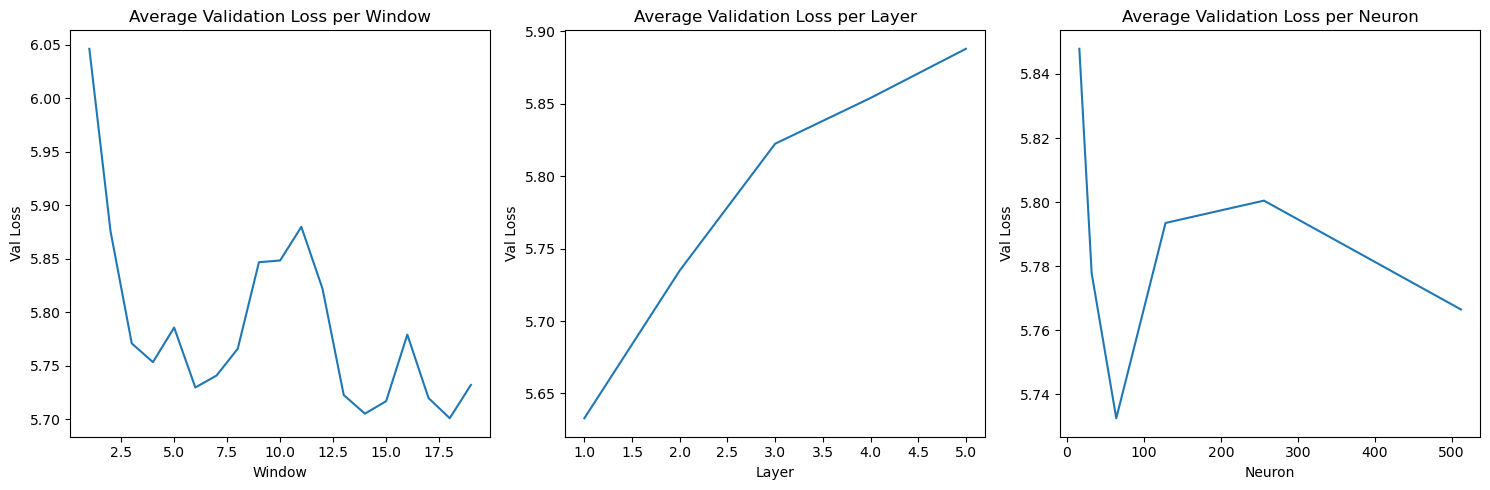

In [23]:
# Calculate the loss values for each unique value of 'Window', 'Layer', and 'Neuron'
vWindowLoss = new_df.groupby('Window')['Val loss'].mean()
vLayerLoss = new_df.groupby('Layer')['Val loss'].mean()
vNeuronLoss = new_df.groupby('Neuron')['Val loss'].mean()

# Create a figure with subplots arranged horizontally
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'Window'
axs[0].plot(new_df['Window'].unique(), vWindowLoss)
axs[0].set_xlabel('Window')
axs[0].set_ylabel('Val Loss')
axs[0].set_title('Average Validation Loss per Window')

# Plot for 'Layer'
axs[1].plot(new_df['Layer'].unique(), vLayerLoss)
axs[1].set_xlabel('Layer')
axs[1].set_ylabel('Val Loss')
axs[1].set_title('Average Validation Loss per Layer')

# Plot for 'Neuron'
axs[2].plot(new_df['Neuron'].unique(), vNeuronLoss)
axs[2].set_xlabel('Neuron')
axs[2].set_ylabel('Val Loss')
axs[2].set_title('Average Validation Loss per Neuron')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()

In [9]:
new_df.sort_values('Val loss', ascending=True).head(10)

,Window,Layer,Neuron,Val loss
335,12,1,512,5.253444
485,17,1,512,5.274645
215,8,1,512,5.279023
305,11,1,512,5.300607
245,9,1,512,5.307311
365,13,1,512,5.312198
395,14,1,512,5.321842
515,18,1,512,5.322222
425,15,1,512,5.323537
185,7,1,512,5.328053


In [11]:
print(new_df.sort_values('Val loss', ascending=True).head(10).to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 Window &  Layer &  Neuron &  Val loss \\
\midrule
     12 &      1 &     512 &  5.253444 \\
     17 &      1 &     512 &  5.274645 \\
      8 &      1 &     512 &  5.279023 \\
     11 &      1 &     512 &  5.300607 \\
      9 &      1 &     512 &  5.307311 \\
     13 &      1 &     512 &  5.312198 \\
     14 &      1 &     512 &  5.321842 \\
     18 &      1 &     512 &  5.322222 \\
     15 &      1 &     512 &  5.323537 \\
      7 &      1 &     512 &  5.328053 \\
\bottomrule
\end{tabular}



C:\Users\onim-\AppData\Local\Temp\ipykernel_22028\3392651593.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(new_df.sort_values('Val loss', ascending=True).head(10).to_latex(index=False))


C:\Users\onim-\AppData\Local\Temp\ipykernel_22028\1400288339.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_df.pivot('Window', 'Neuron', 'Val loss')


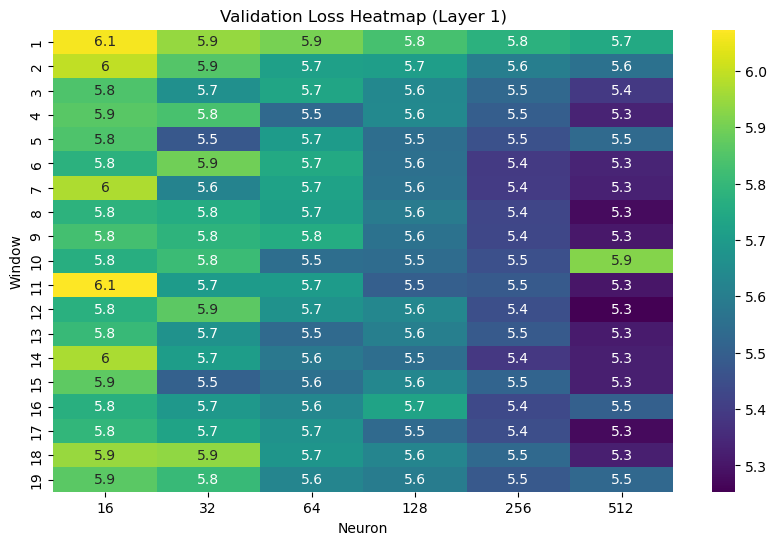

In [22]:
filtered_df = new_df[new_df['Layer'] == 1]

# Pivot the filtered dataframe to create a matrix of 'Val loss' values
heatmap_data = filtered_df.pivot('Window', 'Neuron', 'Val loss')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Validation Loss Heatmap (Layer 1)')
plt.xlabel('Neuron')
plt.ylabel('Window')
plt.show()

In [30]:
Graph_df = new_df[new_df['Layer'] == 1]
Graph_df = Graph_df[Graph_df['Neuron']==512]
Graph_df = Graph_df[Graph_df['Window']==12]

In [31]:
Graph_df

,Window,Layer,Neuron,Val loss
335,12,1,512,5.253444


In [34]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

^C


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\onim-\\AppData\\Roaming\\Python\\Python310\\site-packages\\~ensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.10.1
    Uninstalling tensorflow-2.10.1:
      Successfully uninstalled tensorflow-2.10.1


In [36]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorboard import program

# Load the saved model from the h5 file
model_path = r'C:\Users\onim-\Desktop\Thesis\CV\cross_validation_355_model_weights.h5'
model = load_model(model_path)

# Save the model architecture as a PNG image
plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Start TensorBoard
tb = program.TensorBoard()
tb.configure(argv=[None, '--logdir', './logs'])
url = tb.launch()

# Open the TensorBoard URL in your browser
print('TensorBoard is running at:', url)


ImportError: cannot import name 'type_spec_registry' from 'tensorflow.python.framework' (C:\Users\onim-\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\__init__.py)